In [ ]:
a

<a id='Q0'></a>
<center> <h1> POSTme!: Tool for Social Media Messaging Optimization </center>
<center> <h2> Notebook : Classification Models </h2> </center>
<p style="margin-bottom:1cm;"></p>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong>        
presenting the best combination of features and classification models for predicting the engagement rate on Twitter and LinkedIn posts

After pre-processing the text data, we performed feature engineering, where we tried to extract appropriate features for our classification. Thus, we applied syntactic parsing, entity extraction techniques, topic modeling and sentiment analysis with pre-trained transformers and word embeddings. 

After trying different combinations of features and models: machine learning models and sophisticated deep learning architectures with word embedding layers and numerical features, we selected the best combination in terms of accuracy and explainability: count-based features + date based features + Natural Language Processing Features (sentiment and topic) + Random Forest Classifier. </p>

## Loading Dependencies

In [ ]:
!pip install pycaret
# !pip install scikit-learn==0.23.2 --ignore-installed

     |████████████████████████████████| 301 kB 8.1 MB/s 
     |████████████████████████████████| 1.7 MB 47.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 37.5 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 271 kB 41.3 MB/s 
     |████████████████████████████████| 167 kB 54.8 MB/s 
     |████████████████████████████████| 86 kB 3.5 MB/s 
     |████████████████████████████████| 114 kB 58.9 MB/s 
     |████████████████████████████████| 15.6 MB 35.2 MB/s 
     |████████████████████████████████| 1.3 MB 40.8 MB/s 
     |████████████████████████████████| 2.0 MB 35.5 MB/s 
     |████████████████████████████████| 261 kB 63.8 MB/s 
     |████████████████████████████████| 10.9 MB 36.4 MB/s 
     |████████████████████████████████| 102 kB 7.4 MB/s 
     |█████████████████

In [ ]:
!pip install pyyaml==5.4.1 --ignore-installed

  Using cached PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl (636 kB)


In [ ]:
!pip install fast_ml

     |████████████████████████████████| 42 kB 564 kB/s 


## Loading Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import math
import json

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report, f1_score, accuracy_score,r2_score)
from sklearn.metrics import precision_recall_fscore_support, mutual_info_score
from sklearn.model_selection import cross_val_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
import warnings

from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


import itertools
from itertools import chain


warnings.filterwarnings("ignore")

# Data and Functions Loading

In [ ]:
# Utility Functions
!gdown --id 1vfyfMkOUErzvX5U9DfN-vT-OJ3Qj9kn8

Downloading...
From: https://drive.google.com/uc?id=1vfyfMkOUErzvX5U9DfN-vT-OJ3Qj9kn8
To: /content/util_functions.ipynb
100% 17.9k/17.9k [00:00<00:00, 15.0MB/s]


In [ ]:
# Running Functions module as a script
%run util_functions.ipynb

Writing util_functions.py
from fast_ml.model_development import train_valid_test_split
import matplotlib.pyplot as plt


# FUNCTION --> # Shows you a report with the main info of each column from data frame
def df_main_insights(data_frame):
    print("\nThis data frame have the following shape: ", data_frame.shape)
    for col_name in data_frame.columns:
        print(
            "\nThe column:",
            '"',
            col_name,
            '"',
            "corresponds to index:",
            '"',
            data_frame.columns.get_loc(col_name),
            '"',
            "contains this amount of unique values inside:",
            '"',
            len(data_frame[col_name].unique()),
            '"',
            "contain this type of data:",
            data_frame[col_name].dtypes,
            '"',
        )

# FUNCTION --> # Identifies all unique values for all df columns
def df_identification_of_unique_values_per_column(data_frame):
    # variable to hold the count
    cnt

In [ ]:
# Train, Test, Val Files

!gdown --id 1-WTdyQkRIXqWOjfB7CsQYpAvc-jIOfQL
!gdown --id 1-W7Krj2qNunMy3m1yAFKYGZFzzmrZcpS
!gdown --id 1-YYXKm-DLWtW7YvAk3Ta0ssMNc-RSfwe
!gdown --id 1-GvOTjZeCmA_fOqGDEtsemVfoHIuxkhL
!gdown --id 1-K4z9oVeUU6KhpguvBTI3Pf6g2MF2d9c
!gdown --id 1-DuVt-kXfp2qMpImJDhvyHrJSeEKcFzG

Downloading...
From: https://drive.google.com/uc?id=1-WTdyQkRIXqWOjfB7CsQYpAvc-jIOfQL
To: /content/X_test_c.csv
100% 18.5k/18.5k [00:00<00:00, 24.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-W7Krj2qNunMy3m1yAFKYGZFzzmrZcpS
To: /content/X_val_c.csv
100% 16.1k/16.1k [00:00<00:00, 24.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-YYXKm-DLWtW7YvAk3Ta0ssMNc-RSfwe
To: /content/X_train_c.csv
100% 156k/156k [00:00<00:00, 73.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-GvOTjZeCmA_fOqGDEtsemVfoHIuxkhL
To: /content/y_test_c.csv
100% 261/261 [00:00<00:00, 489kB/s]
Downloading...
From: https://drive.google.com/uc?id=1-K4z9oVeUU6KhpguvBTI3Pf6g2MF2d9c
To: /content/y_train_c.csv
100% 1.96k/1.96k [00:00<00:00, 3.60MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-DuVt-kXfp2qMpImJDhvyHrJSeEKcFzG
To: /content/y_val_c.csv
100% 256/256 [00:00<00:00, 464kB/s]


In [ ]:
y_train = pd.read_csv('/content/y_train_c.csv')
y_test = pd.read_csv('/content/y_test_c.csv')
y_val = pd.read_csv('/content/y_val_c.csv')

X_train = pd.read_csv('/content/X_train_c.csv')
X_test = pd.read_csv('/content/X_test_c.csv')
X_val = pd.read_csv('/content/X_val_c.csv')

In [ ]:
def prepare_data(X_train,X_val,X_test):
  
  train_clean_text = X_train['processed_text']
  val_clean_text = X_val['processed_text']
  test_clean_text = X_test['processed_text']

  X_train = X_train.drop(columns='processed_text')
  X_val = X_val.drop(columns='processed_text')
  X_test = X_test.drop(columns='processed_text')

  return X_train, X_val, X_test, train_clean_text, val_clean_text, test_clean_text

In [ ]:
X_train.columns

Index(['Unnamed: 0', 'day_of_week', 'hour', 'length of text', 'n_hashtags',
       'n_links', 'n_mentions', 'post_type', 'processed_text',
       'flesch_reading_ease_score', 'automated_readability_index', 'polarity',
       'subjectivity', 'person_count', 'norp_count', 'organization_count',
       'gpe_count', 'loc_count', 'product_count', 'date_count', 'noun_count',
       'verb_count', 'adj_count', 'adv_count', 'pron_count', 'Topic 1',
       'Topic 2', 'Sentiment', 'day_time'],
      dtype='object')

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
files = [y_train,y_test,y_val,X_train,X_val,X_test]
for f in files:
  f.drop(columns='Unnamed: 0',inplace=True)

nlp_columns = ['automated_readability_index', 'flesch_reading_ease_score', 'person_count', 'norp_count', 'organization_count',
       'gpe_count', 'loc_count', 'product_count', 'date_count', 'noun_count',
       'verb_count', 'adj_count', 'adv_count', 'pron_count', 'Topic 1', 'hour', 'polarity', 'length of text']

X_train.drop(columns=nlp_columns,inplace=True)
X_test.drop(columns=nlp_columns,inplace=True)
X_val.drop(columns=nlp_columns,inplace=True)

X_train, X_val, X_test, train_clean_text, val_clean_text, test_clean_text = prepare_data(X_train,X_val,X_test)

X_train = pd.concat((X_train,X_val),axis=0)
y_train = pd.concat((y_train,y_val),axis=0)

## Define Categorical and Numeric Features

In [ ]:
X_train['day_of_week'] = X_train['day_of_week'].astype('category')
# X_train['n_mentions'] = X_train['n_mentions'].astype('category')
# X_train['n_links'] = X_train['n_links'].astype('category')
# X_train['n_hashtags'] = X_train['n_hashtags'].astype('category')
X_train['Topic 2'] = X_train['Topic 2'].astype('category')
X_train['Sentiment'] = X_train['Sentiment'].astype('category')

X_test['day_of_week'] = X_test['day_of_week'].astype('category')
# X_test['n_mentions'] = X_test['n_mentions'].astype('category')
# X_test['n_links'] = X_test['n_links'].astype('category')
# X_test['n_hashtags'] = X_test['n_hashtags'].astype('category')
X_test['Topic 2'] = X_test['Topic 2'].astype('category')
X_test['Sentiment'] = X_test['Sentiment'].astype('category')

In [ ]:
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [ ]:
y_train = y_train.replace({2: 1}).astype(int)
y_test = y_test.replace({2: 1}).astype(int)

# Transformer Pipeline for pre-processing

In [ ]:
categorical_transformer = Pipeline(steps=[                                        
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])

numeric_transformer = Pipeline(steps=[
                                      ("scaler", StandardScaler())
                                      ])

preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer,
                                                       numeric_features),
                                               ("cat", categorical_transformer,
                                                       categorical_features)
                                               ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['n_hashtags', 'n_links', 'n_mentions',
                                  'subjectivity']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['day_of_week', 'post_type', 'Topic 2',
                                  'Sentiment', 'day_time'])])

# Model Building


## Pycaret

In [ ]:
from pycaret.classification import *

cla = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'eng_label',
            session_id=13,
            log_experiment=True,
            fix_imbalance=True,
            imputation_type="iterative",
            experiment_name='Social_Media_Eng_c',
            numeric_features=numeric_features,
    categorical_features=categorical_features, silent=True)

,Description,Value
0,session_id,13
1,Target,eng_label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(399, 10)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['day_of_week',
                                                            'post_type',
                                                            'Topic 2',
                                                            'Sentiment',
                                                            'day_time'],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['n_hashtags',
                                                          'n_links',
                                                          'n_mention

‘lr’ - Logistic Regression

‘knn’ - K Neighbors Classifier

‘nb’ - Naive Bayes

‘dt’ - Decision Tree Classifier

‘svm’ - SVM - Linear Kernel

‘rbfsvm’ - SVM - Radial Kernel

‘gpc’ - Gaussian Process Classifier

‘mlp’ - MLP Classifier

‘ridge’ - Ridge Classifier

‘rf’ - Random Forest Classifier

‘qda’ - Quadratic Discriminant Analysis

‘ada’ - Ada Boost Classifier

‘gbc’ - Gradient Boosting Classifier

‘lda’ - Linear Discriminant Analysis

‘et’ - Extra Trees Classifier

‘xgboost’ - Extreme Gradient Boosting

‘lightgbm’ - Light Gradient Boosting Machine

‘catboost’ - CatBoost Classifier

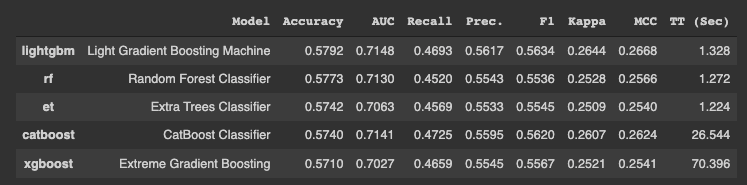

In [ ]:
models = ["lr", "knn", "dt", "rf", "svm", "rbfsvm", "nb", "ada", "lightgbm", "gbc", "et"]
best_model = compare_models(fold=5, include=models, n_select=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.5451,0.0000,0.4217,0.5418,0.4087,0.0609,0.0890,0.016
rf,Random Forest Classifier,0.5414,0.5529,0.4597,0.4724,0.4626,0.0645,0.0650,0.390
et,Extra Trees Classifier,0.5377,0.5376,0.4750,0.4706,0.4725,0.0609,0.0609,0.372
rbfsvm,SVM - Radial Kernel,0.5342,0.5152,0.7063,0.4782,0.5637,0.1036,0.1212,0.026
knn,K Neighbors Classifier,0.5339,0.5671,0.5653,0.4775,0.5153,0.0751,0.0758,0.100
lightgbm,Light Gradient Boosting Machine,0.5160,0.5141,0.4193,0.4461,0.4245,0.0134,0.0138,0.096
gbc,Gradient Boosting Classifier,0.5054,0.5130,0.4427,0.4381,0.4383,-0.0017,-0.0019,0.070
lr,Logistic Regression,0.4984,0.5292,0.5823,0.4442,0.5028,0.0157,0.0158,0.664
ada,Ada Boost Classifier,0.4946,0.4935,0.4757,0.4277,0.4455,-0.0129,-0.0144,0.076
dt,Decision Tree Classifier,0.4767,0.4701,0.4173,0.4022,0.4090,-0.0600,-0.0601,0.018


INFO:logs:create_model_container: 11
INFO:logs:master_model_container: 11
INFO:logs:display_container: 2
INFO:logs:[SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=13, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_

## Select the best model

In [ ]:
best_model[1]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

## Evaluate the best model

In [ ]:
pipeline_random = Pipeline([("pre_process", preprocessor), 
                         ("model", best_model[1])])

pipeline_random.fit(X_train, y_train)
y_pred = pipeline_random.predict(X_test)

class_labels = pipeline_random.named_steps['model'].classes_
print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.57      0.62      0.59        21
           1       0.64      0.58      0.61        24

    accuracy                           0.60        45
   macro avg       0.60      0.60      0.60        45
weighted avg       0.60      0.60      0.60        45



,0,1
0,13,8
1,10,14


In [ ]:
evaluate_model(best_model[1]);

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…